Q learning uses Bellmen's equation. The equation takes 2 arguments, state and action, the resultant is reward for that pair.

Q(s,a)=R(s,a)+ gama. max Q(s',a)

Q(s,a) is state, action pair 
R(s,a) is the reward
gama is the discount factor. It implies the importance of future rewards
max Q(s',a) is the max Q value for the next state, s'


In [7]:
# Define a environment
import numpy as np
n_states = 16
n_actions = 4 # up, down, left, right
goal_states = 15
Q_table = np.zeros((n_states, n_actions))

In [4]:
# hyperparameters
lr = 0.8
gama = 0.95 # discount factor
min_epsilon = 0.05
max_epsilon = 1.0 
epsilon_decay = 0.005
epochs = 1000

In [11]:
# define epsilon-greedy strategy
def epsilon_greedy_action(state, Q_table, epsilon):
    # generate a random number between 0 and 1. 
    # If the number is greater than exploration_prob, choose the action with the highest Q-value
    if np.random.rand(0,1) > epsilon:
        return np.argmax(Q_table[state])
    else:
        # Otherwise, choose a random action
        return np.random.choice(n_actions)


In [ ]:
# define a greedy policy
def greedy_policy(Q_table,state):
    # return the action with the highest Q-value for the given state
    return np.argmax(Q_table[state])

In [ ]:
for epoch in range(epochs):
    #current state is randomly initialized from 0 to n_states
    current_state = np.random.randint(0, n_states)
    while current_state != goal_states:
        # choose an action using epsilon-greedy strategy
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay * epoch)
        action = epsilon_greedy_action(current_state, Q_table, epsilon)
        # compute the next state
        next_state = (current_state + 1) % n_states
        # compute the reward
        reward = 1 if next_state == goal_states else 0
        # update the Q-value
        Q_table[current_state, action] += lr * (reward + gama * np.max(Q_table[next_state]) - Q_table[current_state, action])
        # move to the next state
        current_state = next_state
                     

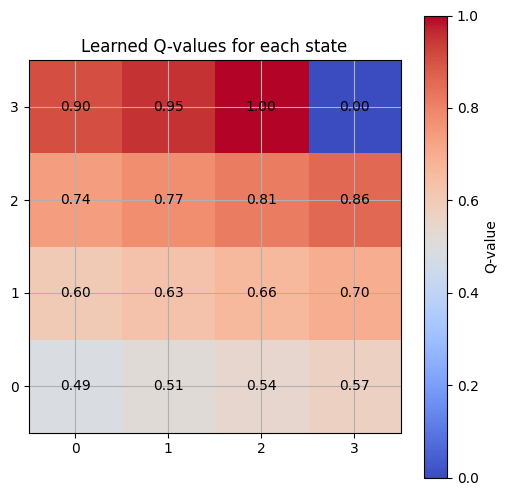

Learned Q-table:
[[0.48767498 0.46816798 0.39013998 0.46816798]
 [0.51334016 0.51334207 0.51334208 0.        ]
 [0.54033994 0.54036008 0.54035317 0.54036009]
 [0.56880009 0.56880009 0.56880009 0.56880009]
 [0.59873694 0.59873693 0.59873694 0.59873694]
 [0.63024941 0.63024941 0.63024941 0.63024941]
 [0.66342043 0.66342043 0.66342043 0.66342043]
 [0.6983373  0.6983373  0.6983373  0.6983373 ]
 [0.73509189 0.73509189 0.73509189 0.73509189]
 [0.77378094 0.77378094 0.77378094 0.77378094]
 [0.81450625 0.81450625 0.81450625 0.81450625]
 [0.857375   0.857375   0.857375   0.857375  ]
 [0.9025     0.9025     0.9025     0.9025    ]
 [0.95       0.95       0.95       0.95      ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


In [ ]:
import matplotlib.pyplot as plt
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4)) 

# Plot the grid of Q-values
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()  # To match grid layout
plt.grid(True)

# Annotating the Q-values on the grid
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# Print learned Q-table
print("Learned Q-table:")
print(Q_table)